# 3 Contrained optimization


We re-use the quadratic function from last exercise $f: \mathcal{R}^2 \rightarrow \mathcal{R}$ defined as 

$$
f(\mathbf{x}) = (\mathbf{x} - \tilde{\mathbf{x}}) \cdot \mathbf{Q} \cdot (\mathbf{x} - \tilde{\mathbf{x}})
$$
with 
$$
\mathbf{Q} = 
\begin{pmatrix}
    2 & 1 \\
    1 & 1 
\end{pmatrix} 
\quad 
\text{and}
\quad
\tilde{\mathbf{x}} = 
\begin{pmatrix}
    -1\\
    1 
\end{pmatrix}
$$
to test the implemented gradient decent methods.

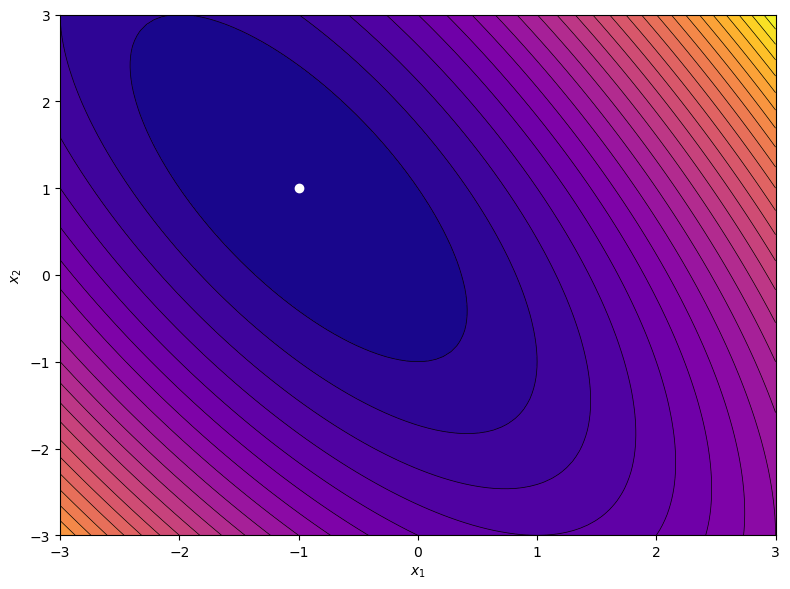

In [2]:
import torch
from utils import plot_contours

torch.set_default_dtype(torch.double)

# Define domain
x1 = torch.linspace(-3, 3, steps=100)
x2 = torch.linspace(-3, 3, steps=100)
x = torch.stack(torch.meshgrid(x1, x2, indexing="xy"), dim=2)

# Define constants
xt = torch.tensor([-1.0, 1.0])
Q = torch.tensor([[2.0, 1.0], [1, 1.0]])


# Define function
def f(x):
    dx = x - xt
    return torch.einsum("...i,ij,...j", dx, Q, dx)


# Plot function as contour lines
plot_contours(x[..., 0], x[..., 1], f(x), opti=[-1, 1])


## Task 1 - Box constraints
We want to solve the problem
$$
    \min_{\mathbf{x}} \quad f(\mathbf{x})= (\mathbf{x}-\tilde{\mathbf{x}}) \cdot \mathbf{Q} \cdot (\mathbf{x}-\tilde{\mathbf{x}})\\
    \textrm{s.t.} \quad      \mathbf{x}^l \le \mathbf{x} \le \mathbf{x}^u\\
$$


We have a predefined function named `box_constrained_decent(x_init, func, x_lower, x_upper, eta=0.1, maxiter=100)` that takes an initial point $\mathbf{x}_0 \in \mathcal{R}^d$ named `x_init`, a function `func`, a lower limit $\mathbf{x}^l \in \mathcal{R}^d$ named `x_lower`, an upper limit $\mathbf{x}^u \in \mathcal{R}^d$ named `x_upper`,  a step size `eta`, and an iteration limit `max_iter`. 

a) Implement a simple steepest gradient decent in that function . The function should return a list of all steps $\mathbf{x}_k \in \mathcal{R}^d$ taken during the optimization, i.e. `[[x1_0, x2_0, ..., xd_0], [x1_1, x2_1, ..., xd_1], ...]`

In [3]:
def box_constrained_decent(x_init, func, x_lower, x_upper, eta=0.1, max_iter=100):
    # Copy initial x to new differentiable tensor x
    x = x_init.clone().requires_grad_()

    points = [x]
    
    # Implement your solution here
    # ...

    return points


b) Test the function with the following code for 
$$
    \mathbf{x}_0 = \begin{pmatrix}1\\-1\end{pmatrix}
    \quad 
    \mathbf{x}^{l} = \begin{pmatrix}0\\-2\end{pmatrix}
    \quad 
    \mathbf{x}^{u} = \begin{pmatrix}2\\2\end{pmatrix}
$$
and play around with the optional parameters. 

Final values are x_1=1.000, x_2=-1.000


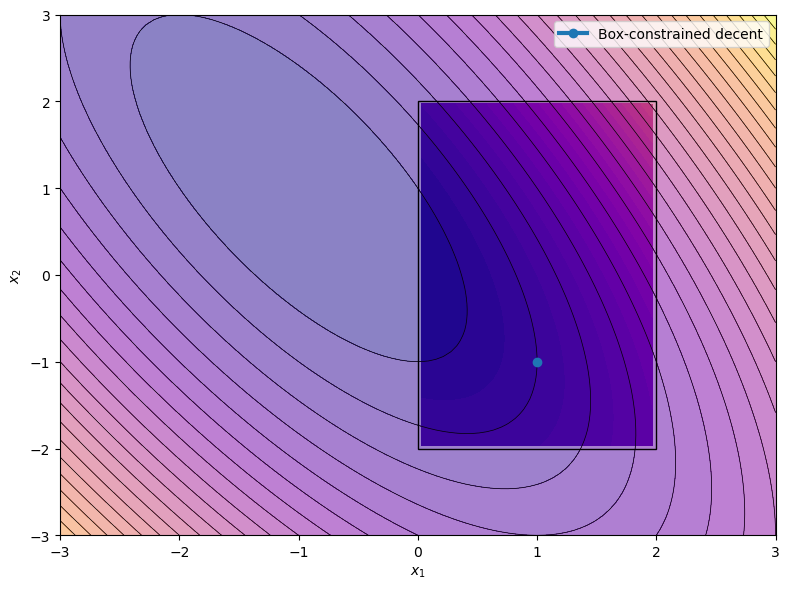

In [4]:
x_init = torch.tensor([1.0, -1.0])
x_lower = torch.tensor([0.0, -2.0])
x_upper = torch.tensor([2.0, 2.0])
path = box_constrained_decent(x_init, f, x_lower, x_upper)

plot_contours(
    x[..., 0],
    x[..., 1],
    f(x),
    box=[x_lower, x_upper],
    paths={"Box-constrained decent": path},
)
print(f"Final values are x_1={path[-1][0]:.3f}, x_2={path[-1][1]:.3f}")


## Task 2 - Visualizing Lagrangian duality

We consider a function $f: \mathcal{R} \rightarrow \mathcal{R}$ defined as 
$$ f(x) = x^2$$ 
for the box-constrained optimization problem 
$$
\min_{x} f(x) \\
s.t. \quad x \ge 1.
$$
We can solve this problem easily by clipping the unconstrained solution $\hat{x}=0$ with the domain as 
$$ x^* = \min(\max(1, \hat{x}), \infty) = 1$$
or using the algorithm from Task 1. 

a) Use the algorithm from Task 1 `box_constrained_decent` to solve this one-dimensional problem. 


In [5]:
# Define 'x_init', 'x_lower' and 'x_upper'
# ...

# Define f(x)
# ...

# Solve the optimization and print out the final result
# ...

However, we may also interpret the problem differently considering a function $g: \mathcal{R} \rightarrow \mathcal{R}$ defined as 
$$ g(x) = 1-x$$
for the constrained optimization problem 
$$
\min_{x} f(x) \\
s.t. \quad g(x) \le 0.
$$

b) Formulate the Lagrangian and plot the Langrangian as function of $x$ and $\mu$. Explain the shape of the plot.

TypeError: Input z must be 2D, not 0D

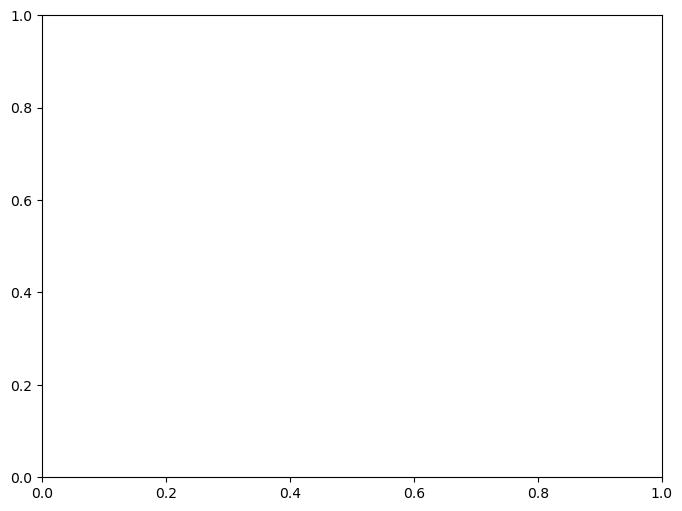

In [6]:
import matplotlib.pyplot as plt 

# Define domain
x_s = torch.linspace(-10, 10, steps=100)
mu_s = torch.linspace(-10, 10, steps=100)
x, mu = torch.meshgrid(x_s, mu_s, indexing="xy")


# Define Lagrangian
def L(x, mu):
    # Implement the Lagrangian function here 
    pass

# Plot the Lagrangian
plot_contours(x, mu, L(x, mu))
plt.xlabel("x")
plt.ylabel("µ")
plt.colorbar()


b) Solve the problem analytically using KKT conditions.

> 

c) Solve the problem using Lagrangian duality and visualize the dual problem in the plot by adding a line $x^*(\mu)$ and plotting the dual objective function. Interpret this line and how it is related to the dual procedure 
$$\max_{\mu} \min_{x} L(x, \mu)$$

> 

TypeError: Input z must be 2D, not 0D

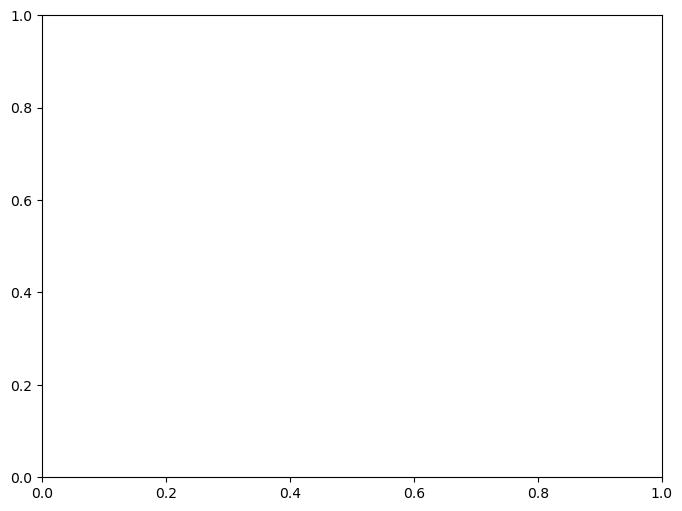

In [7]:
plot_contours(x, mu, L(x, mu), opti=[1,2])
# Add the line plot here 
# ...
plt.xlim([-10,10])
plt.xlabel("x")
plt.ylim([-10,10]) 
plt.ylabel("µ")
plt.colorbar()

## Task 3 - The first structural optimization problem

The three-bar truss illustrated below consists of three bars with the following properties:
- Bar 1 connecting nodes $n^0$ and $n^1$: cross section $A_1$, Young's modulus $E$, length $l$
- Bar 2 connecting nodes $n^1$ and $n^2$: cross section $A_2$, Young's modulus $E$, length $l$
- Bar 3 connecting nodes $n^0$ and $n^2$: cross section $A_3$, Young's modulus $E$, length $\sqrt{2}l$

The truss is subjected to a force $P>0$ at $\mathbf{n}^0$, fixed in $\mathbf{n}^1$ ($u^1_1=0, u^1_2=0$) and simply supported in $\mathbf{n}^2$ ($u^2_1=0$). We want to maximize the stiffness of the truss assembly by minimizing its compliance $P u_2^0$, where $u_2^0$ is the displacement in the vertical $x_2$-direction of node $n_0$. The volume of the trusses may not exceed a volume $V_0$. The design variables are the cross-sectional areas of the bars $\mathbf{x} = \begin{pmatrix} A_1,A_2,A_3\end{pmatrix}^\top$.


![Three bar truss](figures/three_bar_truss.png)


Credits: Peter W. Christensen and Anders Klarbring. *An Introduction to Structural Optimization.* Springer Netherlands, 2008.


a) Formulate the problem as a constrained optimization problem using an explicit expression for $u_2^0$.

> 

b) Solve the problem analytically using KKT conditions.

>

c) Solve the problem analytically using Lagrangian duality.

> 

d) Define the objective function using $x_1=x_2$ and plot it in the $x_1$-$x_3$ plane as contour plot. Assuming $L=1$ and $V_0=1$, plot the contrained area.

NameError: name 'torch' is not defined

>

>
